In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

sns.set()

In [3]:
df = pd.read_csv('cd_sales_concert_attendance.csv')
df.head()

Artist  cd_sales  people_attend_concert
0       1        61                   4.28
1       2        63                   4.08
2       3        67                   4.42
3       4        69                   4.17
4       5        70                   4.48

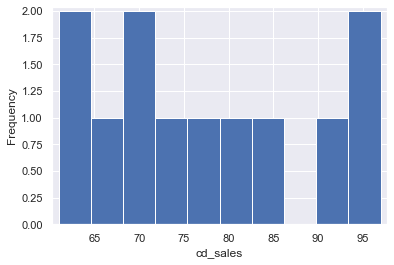

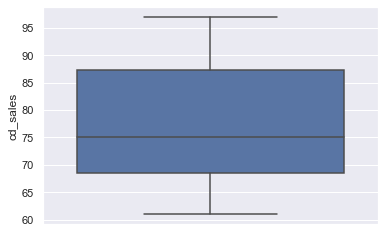

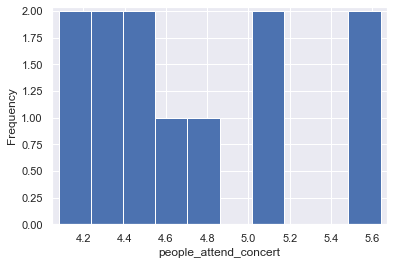

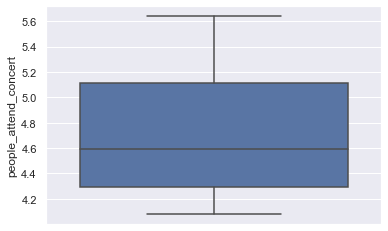

In [4]:
continuous_columns = ('cd_sales', 'people_attend_concert')

for col in continuous_columns:
    _ = plt.hist(df[col])
    _ = plt.xlabel(col)
    _ = plt.ylabel('Frequency')
    _ = plt.margins(0.02)
    plt.show()
    _ = sns.boxplot(df[col], orient='v')
    _ = plt.ylabel(col)
    plt.show()

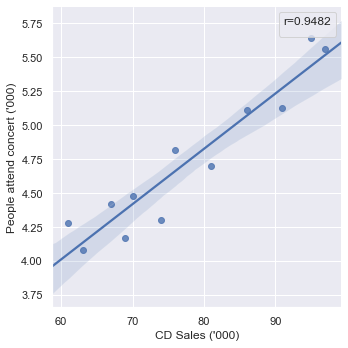

In [5]:
# plot selected corr's
plot_for_columns = ['people_attend_concert']

for col in plot_for_columns:
    _ = sns.lmplot(x='cd_sales', y=col, data=df)
    _ = plt.ylabel("People attend concert (\'000)")
    _ = plt.xlabel("CD Sales (\'000)")
    _ = plt.legend(labels=(), title='r={}'.format(round(df.cd_sales.corr(df[col]), 4)))
plt.show()

In [8]:
X = df.cd_sales
X = sm.add_constant(X)
y = df.people_attend_concert
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

/usr/local/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     people_attend_concert   R-squared:                       0.899
Model:                               OLS   Adj. R-squared:                  0.889
Method:                    Least Squares   F-statistic:                     89.09
Date:                   Sat, 11 Jan 2020   Prob (F-statistic):           2.69e-06
Time:                           13:52:09   Log-Likelihood:                 4.8312
No. Observations:                     12   AIC:                            -5.662
Df Residuals:                         10   BIC:                            -4.693
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5698      0.338      4.643      0.001       0.816       2.323
cd_sales       0.0407      0.004      9.439      0.000       0.031       0.050
==============================================================================
Omnibus:                        1.556   Durbin-Watson:                   2.962
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                0.872
Skew:                          -0.253   Prob(JB):                        0.647
Kurtosis:                       1.780   Cond. No.                         518.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The coefficient of the determinant (r-squared) is the proportion of variability of the dependent variable (y) accounted for, or explained by, the independent variable (x)

In [10]:
predictions

0     4.052590
1     4.133993
2     4.296800
3     4.378203
4     4.418905
5     4.581711
6     4.663114
7     4.866622
8     5.070130
9     5.273638
10    5.436445
11    5.517848
dtype: float64